In [2]:
import os
import sys
os.chdir('../')
sys.path.append(os.getcwd())
from matplotlib.gridspec import GridSpec


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
md = pd.read_csv('data/unprocessed_fmba_metadata.csv')

In [9]:
md = md[md.COVID_status != 'unknown'] 

In [11]:
md.COVID_status = md.COVID_status.apply(lambda x: 'COVID' if x == 'precovid' else x)

In [12]:
md.COVID_status.value_counts()

COVID      1179
healthy     433
Name: COVID_status, dtype: int64

In [14]:
md.shape

(1612, 342)

In [24]:
md.columns

Index(['folder', 'sequencingDate', 'sequencer', 'R1', 'R2', 'name', 'species',
       'startingMaterial', 'libraryType', 'projectName',
       ...
       'time_point', 'timepoint', 'tissue', 'treatment', 'type',
       'undetermined', 'vaccine', 'volume_taken', 'waist(cm)', 'weight(kg)'],
      dtype='object', length=342)

In [18]:
usual_desc= pd.read_csv('data/desc_fmba_not_nan_hla.csv').drop(columns=['Unnamed: 0'])

In [19]:
usual_desc.columns

Index(['run', 'reads', 'clonotypes', 'singletons', 'doubletons', 'file.id',
       'sequencingDate', 'folder', 'R1', 'R2', 'name', 'COVID_status',
       'projectName', 'COVID_IgG', 'COVID_IgM', 'COVID_PCR', 'HLA-A.1',
       'HLA-A.2', 'HLA-B.1', 'HLA-B.2', 'HLA-C.1', 'HLA-C.2', 'HLA-DPB1.1',
       'HLA-DPB1.2', 'HLA-DQB1.1', 'HLA-DQB1.2', 'HLA-DRB1.1', 'HLA-DRB1.2',
       'id', 'subsequent_sequencing', 'HLA-DRB4.1', 'HLA-DRB3.1', 'HLA-DRB5.1',
       'gene', 'is.bad.reseq'],
      dtype='object')

In [27]:
full_desc = md[usual_desc.drop(columns=['reads', 'clonotypes', 'singletons', 'doubletons', 'file.id', 'is.bad.reseq', 'run']).columns]

In [28]:
full_desc

,sequencingDate,folder,R1,R2,name,COVID_status,projectName,COVID_IgG,COVID_IgM,COVID_PCR,...,HLA-DQB1.1,HLA-DQB1.2,HLA-DRB1.1,HLA-DRB1.2,id,subsequent_sequencing,HLA-DRB4.1,HLA-DRB3.1,HLA-DRB5.1,gene
0,2020 09 28,2020/09_FMBA_NovaSeq2_DNA,050002290808_S117_L002_R1_001.fastq.gz,050002290808_S117_L002_R2_001.fastq.gz,050002290808,COVID,FMBA_DNA,yes,yes,negative,...,DQB1*03:01,DQB1*06:03,DRB1*11:01,DRB1*13:01,050002290,NaN,NaN,NaN,NaN,NaN
1,2020 09 28,2020/09_FMBA_NovaSeq2_DNA,050002340808_S116_L002_R1_001.fastq.gz,050002340808_S116_L002_R2_001.fastq.gz,050002340808,COVID,FMBA_DNA,yes,yes,negative,...,DQB1*03:02,DQB1*06:04,DRB1*04:01,DRB1*13:02,050002340,NaN,NaN,NaN,NaN,NaN
2,2020 09 28,2020/09_FMBA_NovaSeq2_DNA,050002460808_S119_L002_R1_001.fastq.gz,050002460808_S119_L002_R2_001.fastq.gz,050002460808,COVID,FMBA_DNA,no,no,negative,...,DQB1*02:02,DQB1*05:01,DRB1*01:01,DRB1*07:01,050002460,NaN,NaN,NaN,NaN,NaN
3,2020 09 28,2020/09_FMBA_NovaSeq2_DNA,050002630808_S113_L002_R1_001.fastq.gz,050002630808_S113_L002_R2_001.fastq.gz,050002630808,COVID,FMBA_DNA,yes,yes,negative,...,DQB1*02:02,DQB1*06:03,DRB1*07:01,DRB1*13:01,050002630,NaN,NaN,NaN,NaN,NaN
4,2020 09 28,2020/09_FMBA_NovaSeq2_DNA,050003120808_S112_L002_R1_001.fastq.gz,050003120808_S112_L002_R2_001.fastq.gz,050003120808,COVID,FMBA_DNA,yes,yes,negative,...,DQB1*02:02,DQB1*04:02,DRB1*07:01,DRB1*08:04,050003120,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,2021 01 07,2021/01_FMBA_NovaSeq9,p18_95_DNA_S31_L002_R1_001.fastq.gz,p18_95_DNA_S31_L002_R2_001.fastq.gz,p18_95_DNA,COVID,FMBA_DNA,NaN,NaN,NaN,...,NaN,DQB*05:01,NaN,DRB*01:01,p18_95,NaN,NaN,NaN,NaN,NaN
1629,2021 01 07,2021/01_FMBA_NovaSeq9,p18_96_DNA_S32_L002_R1_001.fastq.gz,p18_96_DNA_S32_L002_R2_001.fastq.gz,p18_96_DNA,COVID,FMBA_DNA,NaN,NaN,NaN,...,DQB*06:02,DQB*03,DRB*15:01,DRB*12,p18_96,NaN,NaN,NaN,NaN,NaN
1630,2021 01 07,2021/01_FMBA_NovaSeq9,p18_97_DNA_S33_L002_R1_001.fastq.gz,p18_97_DNA_S33_L002_R2_001.fastq.gz,p18_97_DNA,COVID,FMBA_DNA,NaN,NaN,NaN,...,DQB*06,DQB*06,DRB*13,DRB*07,p18_97,NaN,NaN,NaN,NaN,NaN
1631,2021 01 07,2021/01_FMBA_NovaSeq9,p18_98_DNA_S34_L002_R1_001.fastq.gz,p18_98_DNA_S34_L002_R2_001.fastq.gz,p18_98_DNA,COVID,FMBA_DNA,NaN,NaN,NaN,...,DQB*06,DQB*06,DRB*15,DRB*07,p18_98,NaN,NaN,NaN,NaN,NaN


In [46]:
full_desc['run_beta'] = full_desc.R1.apply(lambda x: x.split('.')[0].replace('_R1_001', '') + '.clonotypes.TRB.txt')

/scratch/ipykernel_650/1584843609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_desc['run_beta'] = full_desc.R1.apply(lambda x: x.split('.')[0].replace('_R1_001', '') + '.clonotypes.TRB.txt')


In [47]:
full_desc['run_alpha'] = full_desc.R1.apply(lambda x: x.split('.')[0].replace('_R1_001', '') + '.clonotypes.TRA.txt')

/scratch/ipykernel_650/1631001637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_desc['run_alpha'] = full_desc.R1.apply(lambda x: x.split('.')[0].replace('_R1_001', '') + '.clonotypes.TRA.txt')


In [48]:
fmba = pd.read_csv('data/fmba_with_read_count.csv')

In [49]:
fmba

,run,number_of_clones,number_of_reads
0,440000250808_S92_L001.clonotypes.TRB.txt,35,56
1,050001830808_S76_L001.clonotypes.TRB.txt,488,673
2,050000090808_S60_L001.clonotypes.TRA.txt,1454,2194
3,780003880808_S83_L001.clonotypes.TRA.txt,377,698
4,440003140808_S50_L001.clonotypes.TRB.txt,2028,4242
...,...,...,...
3269,330000550808_S72_L001.clonotypes.TRA.txt,30480,2560926
3270,050002170808_S77_L001.clonotypes.TRB.txt,0,0
3271,330003180807_S94_L001.clonotypes.TRB.txt,16772,24674830
3272,690001200808_S107_L002.clonotypes.TRB.txt,9548,7263921


In [35]:
fmba[fmba.run.str.contains('TRA')]

,run,number_of_clones,number_of_reads
2,050000090808_S60_L001.clonotypes.TRA.txt,1454,2194
3,780003880808_S83_L001.clonotypes.TRA.txt,377,698
6,780004790808_S155_L002.clonotypes.TRA.txt,7681,523951
10,780008450101_S23_L001.clonotypes.TRA.txt,16749,3118710
11,020000280808_S59_L001.clonotypes.TRA.txt,12711,3127923
...,...,...,...
3264,330000410808_S109_L002.clonotypes.TRA.txt,23112,7187890
3265,330000310807_S59_L001.clonotypes.TRA.txt,30644,575206
3267,p17_53_DNA_S66_L001.clonotypes.TRA.txt,102793,6062247
3268,640001930808_S53_L001.clonotypes.TRA.txt,20075,2029708


In [36]:
fmba_alpha = fmba[fmba.run.str.contains('TRA')]
fmba_alpha['selected'] = fmba_alpha.number_of_reads > 1e5

/scratch/ipykernel_650/61125754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fmba_alpha['selected'] = fmba_alpha.number_of_reads > 1e5


In [37]:
fmba_alpha.selected.value_counts()

True     1322
False     315
Name: selected, dtype: int64

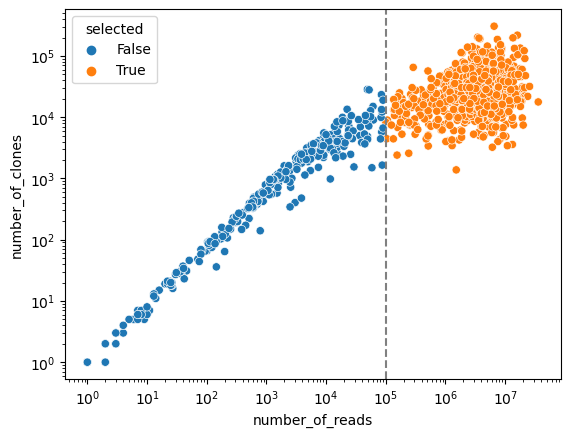

In [38]:
sns.scatterplot(data=fmba_alpha, x='number_of_reads', y='number_of_clones', hue='selected')
plt.xscale('log')
plt.yscale('log')
plt.axvline(x=1e5, linestyle='dashed', color='grey')

In [39]:
fmba_beta = fmba[fmba.run.str.contains('TRB')]
fmba_beta['selected'] = fmba_beta.number_of_reads > 1e5

/scratch/ipykernel_650/3516423545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fmba_beta['selected'] = fmba_beta.number_of_reads > 1e5


In [40]:
fmba_beta.selected.value_counts()

True     1274
False     363
Name: selected, dtype: int64

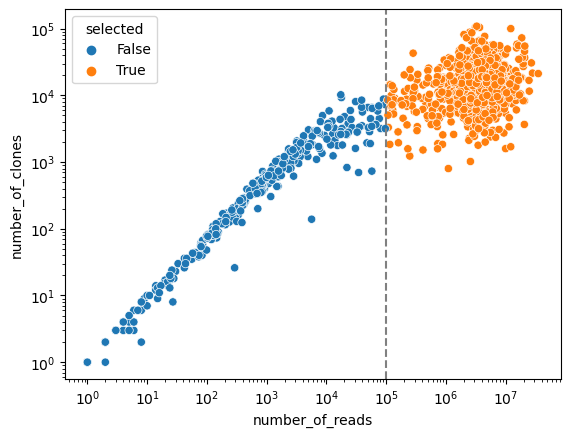

In [41]:
sns.scatterplot(data=fmba_beta, x='number_of_reads', y='number_of_clones', hue='selected')
plt.xscale('log')
plt.yscale('log')
plt.axvline(x=1e5, linestyle='dashed', color='grey')

In [44]:
fmba_alpha

,run,number_of_clones,number_of_reads,selected
2,050000090808_S60_L001.clonotypes.TRA.txt,1454,2194,False
3,780003880808_S83_L001.clonotypes.TRA.txt,377,698,False
6,780004790808_S155_L002.clonotypes.TRA.txt,7681,523951,True
10,780008450101_S23_L001.clonotypes.TRA.txt,16749,3118710,True
11,020000280808_S59_L001.clonotypes.TRA.txt,12711,3127923,True
...,...,...,...,...
3264,330000410808_S109_L002.clonotypes.TRA.txt,23112,7187890,True
3265,330000310807_S59_L001.clonotypes.TRA.txt,30644,575206,True
3267,p17_53_DNA_S66_L001.clonotypes.TRA.txt,102793,6062247,True
3268,640001930808_S53_L001.clonotypes.TRA.txt,20075,2029708,True


In [45]:
full_desc

,sequencingDate,folder,R1,R2,name,COVID_status,projectName,COVID_IgG,COVID_IgM,COVID_PCR,...,HLA-DRB1.1,HLA-DRB1.2,id,subsequent_sequencing,HLA-DRB4.1,HLA-DRB3.1,HLA-DRB5.1,gene,run_beta,run_alpha
0,2020 09 28,2020/09_FMBA_NovaSeq2_DNA,050002290808_S117_L002_R1_001.fastq.gz,050002290808_S117_L002_R2_001.fastq.gz,050002290808,COVID,FMBA_DNA,yes,yes,negative,...,DRB1*11:01,DRB1*13:01,050002290,NaN,NaN,NaN,NaN,NaN,050002290808_S117_L002_001.clonotypes.TRB.txt,050002290808_S117_L002_001.clonotypes.TRA.txt
1,2020 09 28,2020/09_FMBA_NovaSeq2_DNA,050002340808_S116_L002_R1_001.fastq.gz,050002340808_S116_L002_R2_001.fastq.gz,050002340808,COVID,FMBA_DNA,yes,yes,negative,...,DRB1*04:01,DRB1*13:02,050002340,NaN,NaN,NaN,NaN,NaN,050002340808_S116_L002_001.clonotypes.TRB.txt,050002340808_S116_L002_001.clonotypes.TRA.txt
2,2020 09 28,2020/09_FMBA_NovaSeq2_DNA,050002460808_S119_L002_R1_001.fastq.gz,050002460808_S119_L002_R2_001.fastq.gz,050002460808,COVID,FMBA_DNA,no,no,negative,...,DRB1*01:01,DRB1*07:01,050002460,NaN,NaN,NaN,NaN,NaN,050002460808_S119_L002_001.clonotypes.TRB.txt,050002460808_S119_L002_001.clonotypes.TRA.txt
3,2020 09 28,2020/09_FMBA_NovaSeq2_DNA,050002630808_S113_L002_R1_001.fastq.gz,050002630808_S113_L002_R2_001.fastq.gz,050002630808,COVID,FMBA_DNA,yes,yes,negative,...,DRB1*07:01,DRB1*13:01,050002630,NaN,NaN,NaN,NaN,NaN,050002630808_S113_L002_001.clonotypes.TRB.txt,050002630808_S113_L002_001.clonotypes.TRA.txt
4,2020 09 28,2020/09_FMBA_NovaSeq2_DNA,050003120808_S112_L002_R1_001.fastq.gz,050003120808_S112_L002_R2_001.fastq.gz,050003120808,COVID,FMBA_DNA,yes,yes,negative,...,DRB1*07:01,DRB1*08:04,050003120,NaN,NaN,NaN,NaN,NaN,050003120808_S112_L002_001.clonotypes.TRB.txt,050003120808_S112_L002_001.clonotypes.TRA.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,2021 01 07,2021/01_FMBA_NovaSeq9,p18_95_DNA_S31_L002_R1_001.fastq.gz,p18_95_DNA_S31_L002_R2_001.fastq.gz,p18_95_DNA,COVID,FMBA_DNA,NaN,NaN,NaN,...,NaN,DRB*01:01,p18_95,NaN,NaN,NaN,NaN,NaN,p18_95_DNA_S31_L002_001.clonotypes.TRB.txt,p18_95_DNA_S31_L002_001.clonotypes.TRA.txt
1629,2021 01 07,2021/01_FMBA_NovaSeq9,p18_96_DNA_S32_L002_R1_001.fastq.gz,p18_96_DNA_S32_L002_R2_001.fastq.gz,p18_96_DNA,COVID,FMBA_DNA,NaN,NaN,NaN,...,DRB*15:01,DRB*12,p18_96,NaN,NaN,NaN,NaN,NaN,p18_96_DNA_S32_L002_001.clonotypes.TRB.txt,p18_96_DNA_S32_L002_001.clonotypes.TRA.txt
1630,2021 01 07,2021/01_FMBA_NovaSeq9,p18_97_DNA_S33_L002_R1_001.fastq.gz,p18_97_DNA_S33_L002_R2_001.fastq.gz,p18_97_DNA,COVID,FMBA_DNA,NaN,NaN,NaN,...,DRB*13,DRB*07,p18_97,NaN,NaN,NaN,NaN,NaN,p18_97_DNA_S33_L002_001.clonotypes.TRB.txt,p18_97_DNA_S33_L002_001.clonotypes.TRA.txt
1631,2021 01 07,2021/01_FMBA_NovaSeq9,p18_98_DNA_S34_L002_R1_001.fastq.gz,p18_98_DNA_S34_L002_R2_001.fastq.gz,p18_98_DNA,COVID,FMBA_DNA,NaN,NaN,NaN,...,DRB*15,DRB*07,p18_98,NaN,NaN,NaN,NaN,NaN,p18_98_DNA_S34_L002_001.clonotypes.TRB.txt,p18_98_DNA_S34_L002_001.clonotypes.TRA.txt


In [51]:
full_desc[full_desc.run_alpha.isin(fmba_alpha[fmba_alpha.selected].run)].drop(
    columns=['run_beta']).rename(columns={'run_alpha': 'run'}).to_csv('data/preprocessed_fmba_metadata_alpha.csv')

In [53]:
full_desc[full_desc.run_beta.isin(fmba_beta[fmba_beta.selected].run)].drop(
    columns=['run_alpha']).rename(columns={'run_beta': 'run'}).to_csv('data/preprocessed_fmba_metadata_beta.csv')

In [54]:
adaptive = pd.read_csv('data/adaptive_with_reads_count.csv')
adaptive['selected'] = adaptive.number_of_reads > 1e5

In [55]:
hip = pd.read_csv('data/hip_with_reads_count.csv')
hip['selected'] = hip.number_of_reads > 1e5

In [56]:
len(adaptive) + len(hip)

2200

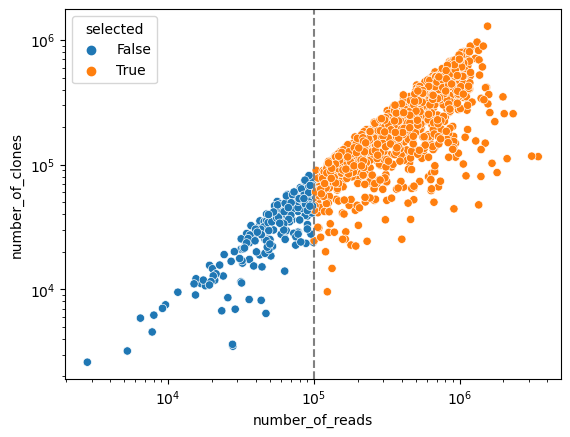

In [57]:
sns.scatterplot(data=adaptive, x='number_of_reads', y='number_of_clones', hue='selected')
plt.xscale('log')
plt.yscale('log')
plt.axvline(x=1e5, linestyle='dashed', color='grey')

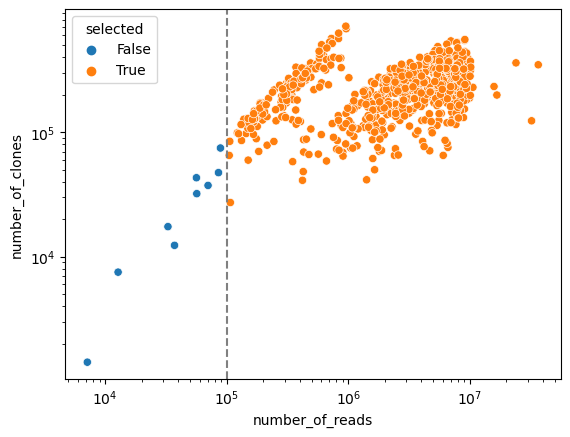

In [58]:
sns.scatterplot(data=hip, x='number_of_reads', y='number_of_clones', hue='selected')
plt.xscale('log')
plt.yscale('log')
plt.axvline(x=1e5, linestyle='dashed', color='grey')

In [59]:
adaptive.selected.value_counts()

True     1214
False     200
Name: selected, dtype: int64

In [60]:
hip.selected.value_counts()

True     777
False      9
Name: selected, dtype: int64

In [61]:
len(hip)

786

In [62]:
pd.concat([hip[~hip.selected], adaptive[~adaptive.selected]]).to_csv('data/bad_quality_adaptive_runs.csv')

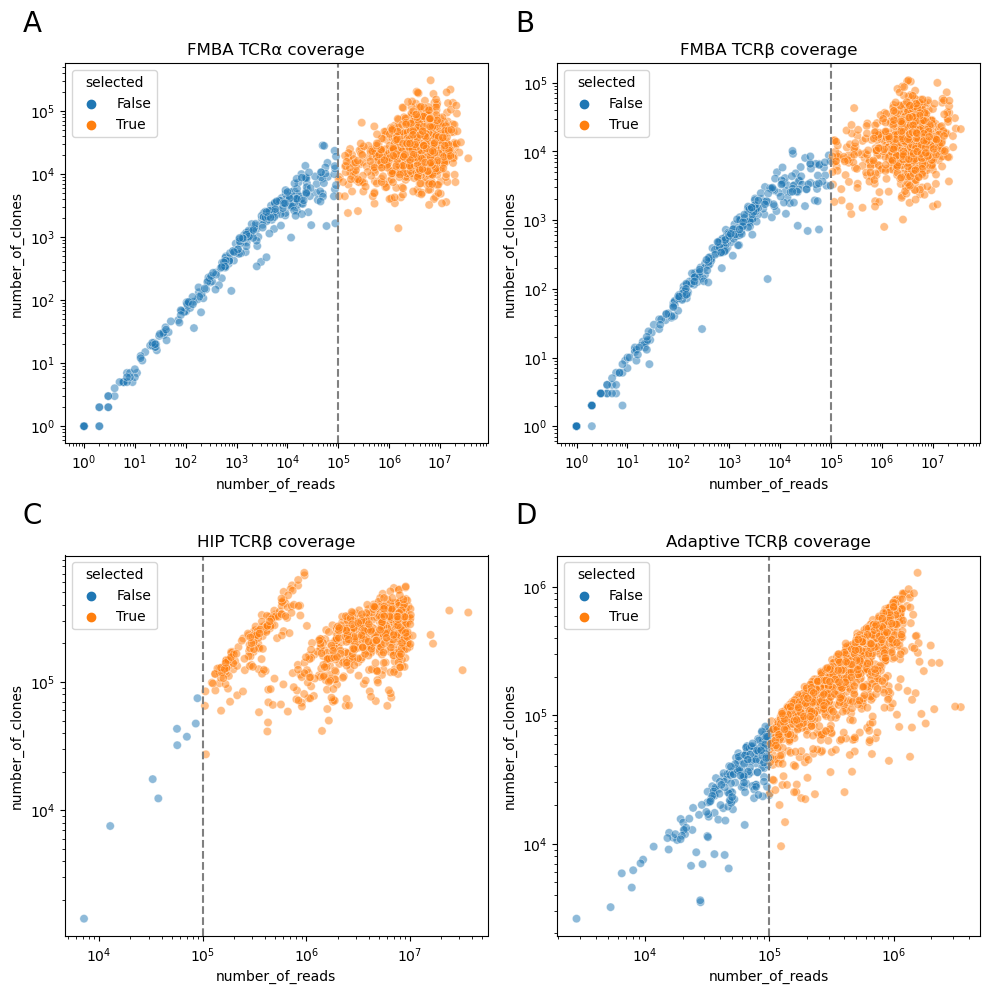

In [63]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(nrows=2, 
              ncols=2)
font_size=20
delta_x=-0.1
delta_y=1.14

########################################################

ax0 = fig.add_subplot(gs[0, 0])
sns.scatterplot(data=fmba_alpha, x='number_of_reads', y='number_of_clones', hue='selected', alpha=0.5, ax=ax0)
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.axvline(x=1e5, linestyle='dashed', color='grey')
ax0.set_title('FMBA TCRα coverage')
ax0.text(delta_x, delta_y, 'A',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax0.transAxes,
        size=font_size)

########################################################

ax1 = fig.add_subplot(gs[0, 1])
sns.scatterplot(data=fmba_beta, x='number_of_reads', y='number_of_clones', hue='selected', alpha=0.5, ax=ax1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.axvline(x=1e5, linestyle='dashed', color='grey')
ax1.set_title('FMBA TCRβ coverage')
ax1.text(delta_x, delta_y, 'B',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax1.transAxes,
        size=font_size)

########################################################

ax2 = fig.add_subplot(gs[1, 0])
sns.scatterplot(data=hip, x='number_of_reads', y='number_of_clones', hue='selected', alpha=0.5, ax=ax2)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.axvline(x=1e5, linestyle='dashed', color='grey')
ax2.set_title('HIP TCRβ coverage')
ax2.text(delta_x, delta_y, 'C',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax2.transAxes,
        size=font_size)


########################################################

ax3 = fig.add_subplot(gs[1, 1])
sns.scatterplot(data=adaptive, x='number_of_reads', y='number_of_clones', hue='selected', alpha=0.5, ax=ax3)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.axvline(x=1e5, linestyle='dashed', color='grey')
ax3.set_title('Adaptive TCRβ coverage')
ax3.text(delta_x, delta_y, 'D',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax3.transAxes,
        size=font_size)

########################################################

plt.tight_layout()
plt.savefig("figures/supp_fig0.svg")
plt.savefig("figures/supp_fig0.pdf")
plt.savefig("figures/supp_fig0.png")
plt.show()
